## Box Plot

The box plot is a compact distribution summary. It takes up less space than a histogram and contains less information but it is great for comparing groups.

## 1. Summarise the history of the box plot and situations in which it used

### a. History of the box plot
Box plots were invented by John Tukey in 1970, but it wasn't until his publication in 1977, "Exploratory Data Analysis", that they became widely known. 

![boxplot_jtukey](boxplot_jtukey.png)

### b. Situations in which it used

Box plots are good for comparison because the distribution is immediately clear. 

It is used in statistics analysis....

Box plots are made up of:

- Median
- upper quartile
- lower quartile
- outliers

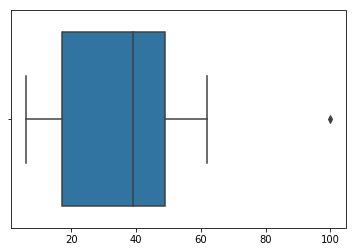

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

data = [51, 17, 25, 39, 7, 49, 62, 41, 20, 6, 43, 13, 100]

ax = sns.boxplot(x=data)
ax

## 2. Demonstrate the use of the box plot using data of your choosing

Dungarvan (Clonea) Rainfall Data

Published by: Met Éireann

https://data.gov.ie/dataset/dungarvan-clonea-rainfall-data

In [15]:
#import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [28]:
# we need to skip the first 9 rows as it is full of notes
df = pd.read_csv("https://cli.fusio.net/cli/climate_data/webdata/dly2007.csv",skiprows=9)
df

,date,ind,rain
0,01-nov-1995,0,0.0
1,02-nov-1995,0,0.0
2,03-nov-1995,0,0.9
3,04-nov-1995,0,5.9
4,05-nov-1995,4,0.0
5,06-nov-1995,0,5.1
6,07-nov-1995,0,1.6
7,08-nov-1995,0,7.9
8,09-nov-1995,0,6.2
9,10-nov-1995,0,5.8


In [40]:
df.describe()

,ind,rain
count,670.000000,670.000000
mean,0.419403,3.332090
std,0.923977,7.484727
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.250000
75%,1.000000,3.500000
max,4.000000,89.600000


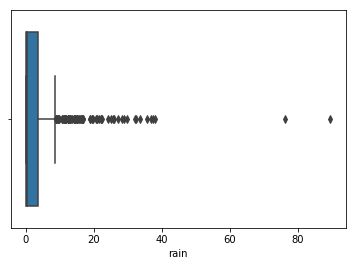

In [29]:
# basic 
%matplotlib inline
myboxplot = sns.boxplot(x=df['rain'])
myboxplot

In [30]:
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html
# convert date column to date time 
df['date'] = pd.to_datetime(df['date'])
df

,date,ind,rain
0,1995-11-01,0,0.0
1,1995-11-02,0,0.0
2,1995-11-03,0,0.9
3,1995-11-04,0,5.9
4,1995-11-05,4,0.0
5,1995-11-06,0,5.1
6,1995-11-07,0,1.6
7,1995-11-08,0,7.9
8,1995-11-09,0,6.2
9,1995-11-10,0,5.8


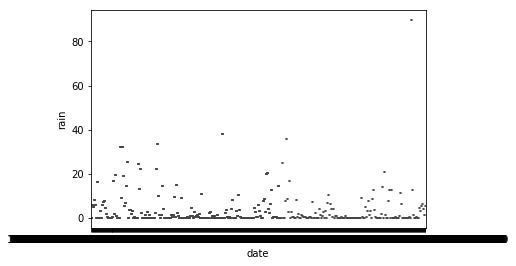

In [37]:
%matplotlib inline
newplot = sns.boxplot(x= df['date'], y = df['rain'])
newplot

## 3. Explain any relevant terminology such as the terms quartile and percentile.

Box plots are made up of:

- Median
- upper quartile
- lower quartile
- outliers

## 4. Compare the box plot to alternatives.

# References

https://en.wikipedia.org/wiki/Box_plot
    
http://theta.edu.pl/wp-content/uploads/2012/10/exploratorydataanalysis_tukey.pdf

http://vita.had.co.nz/papers/boxplots.pdf

https://www150.statcan.gc.ca/n1/edu/power-pouvoir/ch12/5214889-eng.htm